# El Viejo XOR: Métodos No-lineales para Problemas No-lineales

En esta sección, el objetivo es experimentar con modelos no lineales en el ámbito del aprendizaje automático para problemas no lineales. Para esto se trabaja con un dataset famoso llamado XOR, el cual presenta problemas de clasificación linealmente inseparables. La idea es investigar las ideas generales para solucionar este tipo de problemas, diferenciando el poder de los clasificadores no lineales.

## A)

[[ 0.09762701  0.43037873]
 [ 0.20552675  0.08976637]
 [-0.1526904   0.29178823]
 ..., 
 [-0.14979966 -0.29409202]
 [-0.33397826  0.09037856]
 [-0.77174332 -0.6861918 ]]
[-1 -1  1 ...,  1 -1  1]


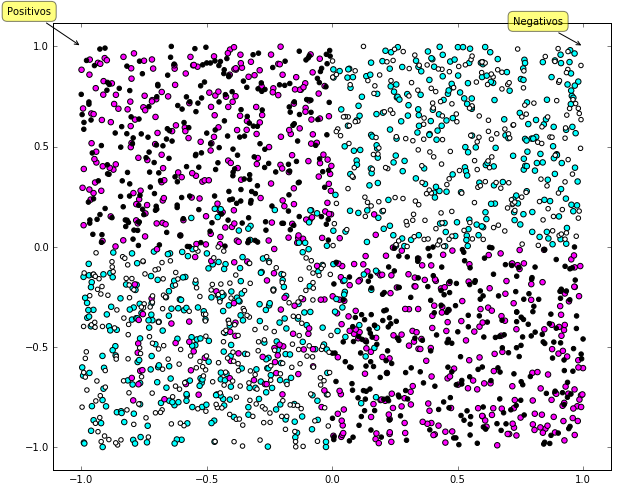

In [2]:
import numpy as np

def do_XOR(n=1000,noisy_n=100,svm=True):
    rng = np.random.RandomState(0)
    X_train = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_train = np.logical_xor(X_train[:,0] > 0, X_train[:,1] > 0)
    Y_train = 2*Y_train-1 if svm else Y_train
    X_noisy= rng.uniform(low=-0.8,high=0.2,size=(noisy_n,2))
    Y_noisy = -1*np.logical_xor(X_noisy[:,0] > 0, X_noisy[:,1] > 0) + 1
    Y_noisy = 2*Y_noisy-1 if svm else Y_noisy
    X_train = np.vstack((X_train, X_noisy))
    Y_train = np.hstack((Y_train, Y_noisy))
    X_test = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    Y_test = 2*Y_test - 1 if svm else Y_test
    return X_train,Y_train,X_test,Y_test

X_train,Y_train,X_test,Y_test = do_XOR()
print X_train
print Y_train

import matplotlib.pyplot as plt
f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(10,8))
axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
plt.axis('tight')
plt.legend(fancybox=True, loc=(1,0.8))

plt.annotate(
        "Negativos", 
        xy = (1, 1), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.annotate(
        "Positivos", 
        xy = (-1, 1), xytext = (-30, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

En primer lugar, se define una función que genera $n$ datos etiquetados para el problema XOR, generando el dataset a utilizar, definiendo el *training set* el cual posee un *noise* (ruido) que afectará en la clasificación del problema, además de definir el *test set* para evaluar los distintos clasificadores. Se generan $1000$ datos de entrenamiento y $1000$ datos de prueba, agregando un $10\%$ de ruido al dataset de entrenamiento para medir la tendencia del *overffiting*.  
Luego, se genera un gráfico que muestra la data de entrenamiento y de prueba, en el que se asigna distintos colores a las distintas clases a clasificar, en este caso, el color blanco y verde agua corresponde a los datos clasificados en la clase $0$, por otro lado el color negro y morado a la clase $1$. El conjunto de colores **morado** y **verde agua** corresponden al *training set*, los colores **negro** y **blanco** corresponden al *test set*, mostrándose claramente el ruido en el tercer cuadrante (colores morados)

Como se puede observar, este gráfico muestra como se clasifican los datos que se encuentren entre los rangos $x_1 \in [-1,0]$, $x_2 \in [-1,0]$ o $x_1 \in [0,1]$, $x_2 \in [0,1]$ , corresponden a la clase $0$. Y los datos que se encuentren entre los rangos $x_1 \in [0,1]$, $x_2 \in [-1,0]$ o $x_1 \in [-1,0]$, $x_2 \in [0,1]$ corresponden a la clase $1$. Esto justamente representa un cambio de bit en multiplexores del tipo XOR, lo que le da el sentido al nombre del problema. Siendo el target(output) la salida de la operación XOR ($y = x_1 \oplus x_2$).  
Siendo el primer cuadrante cuando *x* e *y* son positivos ($1 \oplus 1$), el segundo cuadrante cuando *x* es negativo e *y* positivo ($0 \oplus 1$), el tercer cuadrante cuando *x* e *y* son negativos ($1 \oplus 1$), el cuarto cuadrante cuando *x* es positivo e *y* negativo ($0 \oplus 1$).

## B) SVM - lineal

In [3]:
import matplotlib.pyplot as plt

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-1:1:200j, -1:1:200j]
    if model_type == 'svm':
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    elif model_type == 'tree':
        #Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0  if model_type == 'svm' else Z > 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],levels=[-1, 0, 1])
    plt.show()

=========  ===================  ===============  ===========  ========
        C    Training accuracy    Test accuracy    Precision    Recall
=========  ===================  ===============  ===========  ========
   0.0001             0.512727            0.469     0.457831  0.48008
   0.001              0.513636            0.47      0.458753  0.481113
   0.01               0.517273            0.471     0.459677  0.482143
   0.1                0.517273            0.471     0.459677  0.482143
   1                  0.517273            0.471     0.459677  0.482143
  10                  0.517273            0.471     0.459677  0.482143
 100                  0.525455            0.488     0.482335  0.498567
1000                  0.521818            0.482     0.466513  0.493827
=========  ===================  ===============  ===========  ========
SVM Lineal C = 0.01


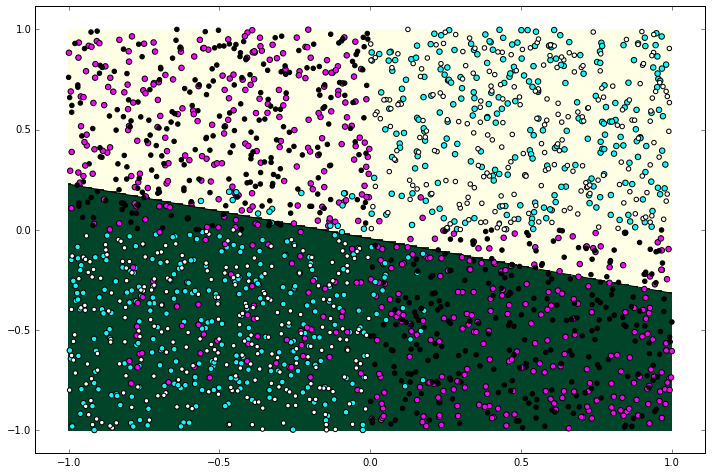

SVM Lineal C = 100


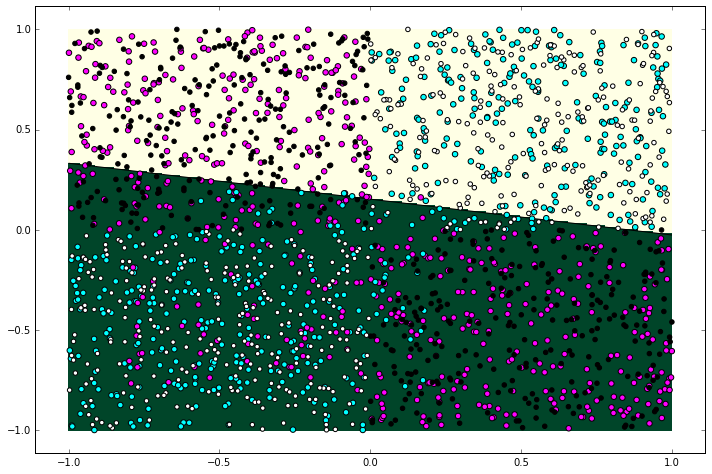

In [33]:
from sklearn.metrics import classification_report,precision_recall_fscore_support
from sklearn.svm import LinearSVC

X_train,Y_train,X_test,Y_test = do_XOR()

info = []
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000]
def do_LinearSVM(x,y,xt,yt):
    for C in Cs:
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        
        acc = model.score(x,y)
        acct = model.score(xt,yt)
        
        prec_rec = precision_recall_fscore_support(yt,model.predict(xt))[:1]
        datos = [C]+[acc,acct] + list(prec_rec[0])
        info.append(datos)
    return info

info = do_LinearSVM(X_train,Y_train,X_test,Y_test)
from tabulate import tabulate
print tabulate(info, headers=["C","Training accuracy","Test accuracy","Precision", "Recall"],  tablefmt="rst")

#graficar solo casos representativos
print "SVM Lineal C = 0.01"
clf = LinearSVC(C=0.01)
clf = clf.fit(X_train, Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

print "SVM Lineal C = 100"
clf = LinearSVC(C=100)
clf = clf.fit(X_train, Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

Como se puede observar en la representacion grafica, la *SVM lineal* no resuelve satisfactoriamente el problema de clasificacion, ya que la separacion de clases es bastante debil y poco precisa. Es facil visualizar que gran parte de ambas clases quedan mezcladas, lo que corresponde aproximadamente a la mitad de los datos de cada clase. Esto se puede corroborar con la informacion presentada en la tabla confeccionada mas arriba, en la que el *test accuracy* varia entre 0.4 y 0.6, al variar el parametro $C$, el cual representa el grado de penalización de la SVM. En otras palabras, esto significa que al momento de clasificar un nuevo dato, hay practicamente un $50\%$ de probabilidad de clasificarlo correctamente. Otras métricas son presentadas para demostrar que con distintos valores del parámetro *C* el clasificador *SVM lineal* no logra clasificar de manera correcta, ya que coloca una frontera separando el plano $R^2$ en 2, clasificando la mitad de los elementos de manera correcta, de ahí sus métricas cercanas al 0.5. Esto no es lo que se espera para clasificar este problema, ya que se requiere una técnica de mas alto nivel para identificar claramente las clases y separarlas correctamente, como se muestra a continuación.   

## C) SMV - no lineal

[0.25, 0.5, 1, 2, 4, 8, 16]
Best Test Accuracy = 0.972000


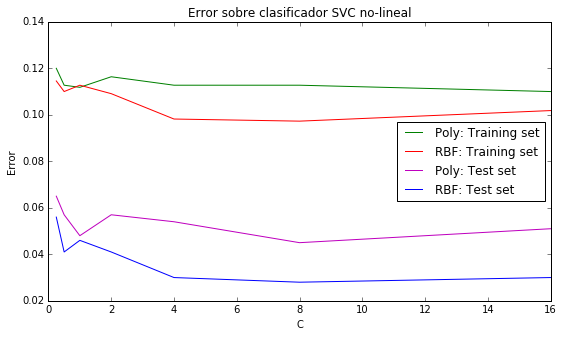

In [17]:
from sklearn.svm import SVC

X_train,Y_train,X_test,Y_test = do_XOR()

Cs = [pow(2,k) for k in np.arange(-2,5,1)]
print Cs

def do_SVC(x,y,xt,yt):
    mejor = 0
    info1 = []
    info2 = []
    for C in Cs:
        clf1 = SVC(C=C, kernel="rbf")
        clf2 = SVC(C=C, kernel="poly",degree=2, coef0=1)
        
        clf1 = clf1.fit(x,y)
        clf2 = clf2.fit(x,y)
        
        acc_1 = clf1.score(x,y)
        acct_1 = clf1.score(xt,yt)
        
        acc_2 = clf2.score(x,y)
        acct_2 = clf2.score(xt,yt)
        
        if acct_1 > mejor:
            mejor = acct_1
        if acct_2 > mejor:
            mejor = acct_2
        info1.append([acc_1,acct_1])
        info2.append([acc_2,acct_2])
    print "Best Test Accuracy = %f"%mejor
    return info1,info2

info1, info2 = do_SVC(X_train,Y_train,X_test,Y_test)
error_train_1 = [ 1-i[0] for i in info1]
error_test_1 = [1-j[1] for j in info1]

error_train_2 = [ 1-i[0] for i in info2]
error_test_2 = [1-j[1] for j in info2]

import matplotlib.pyplot as plt
plt.subplots(figsize=(9,5))
plt.plot(Cs,error_train_2, label = "Poly: Training set", color = "g")
plt.plot(Cs,error_train_1, label = "RBF: Training set", color = "r")

plt.plot(Cs,error_test_2, label = "Poly: Test set", color = "m")
plt.plot(Cs,error_test_1, label = "RBF: Test set", color = "b")

#plt.xticks(Cs)
plt.xlabel('C')
plt.ylabel('Error')
plt.title('Error sobre clasificador SVC no-lineal')
#plt.axis('tight')
plt.legend(loc="center right")
plt.show()

Se puede ver que para distintos *kernel* el clasificador **SVM** entrega distintos resultados, visualizando esta diferencia en el gráfico anterior, donde para el caso de un *kernel* polinomial ("*poly*") de grado 2, posee un mayor error que con un *kernel* multidimensional Gaussiano ("*rbf*"), esto es ya que el *kernel rbf* presenta para este problema un leve mayor poder dimensional para clasifiar correctamente, separando mejor las clases positivas de las negativas, visualizando en los gráficos siguientes.  
Para distintos valores del parámetro *C* del modelo se puede ver que disminuyen levemente el error, esto es ya que los clasificadores se ajustan más fuertemente al *training set* debería poseer un mejor desempeño ya que el comportamiento del dataset fue definido, por lo que se conoce que sigue este descrito en el *training set*, obviando el ruido. Este gráfico presenta una particularidad, esta es que el error sobre el *training set* es mayor que el error sobre el *test set*, esto es ya que este problema de "jugete" posee ruido en el *training set* por lo que presenta este mayor error.

KERNEL POLY, C=1, DEGREE=2 
 Test Accuracy =  0.952


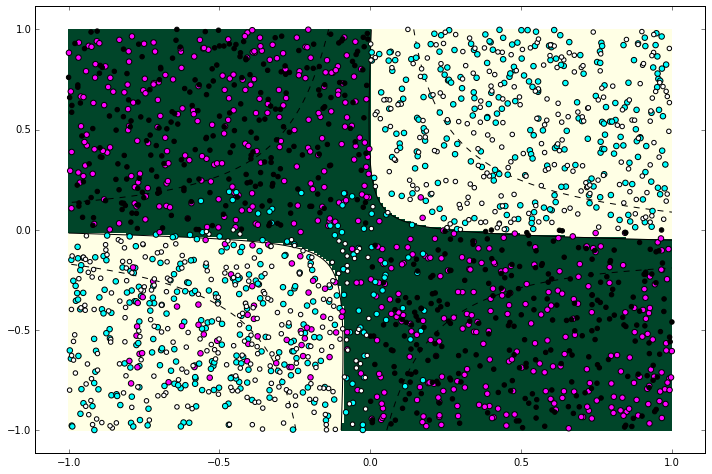

KERNEL RBF, C=1 
 Test Accuracy =  0.954


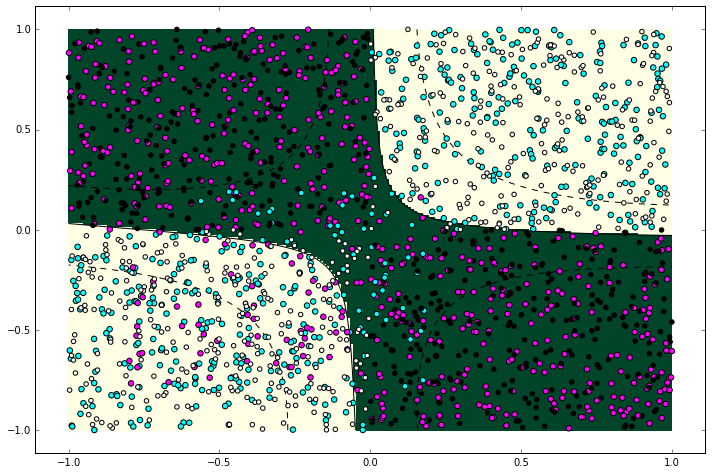

KERNEL RBF, C=4 
 Test Accuracy =  0.97


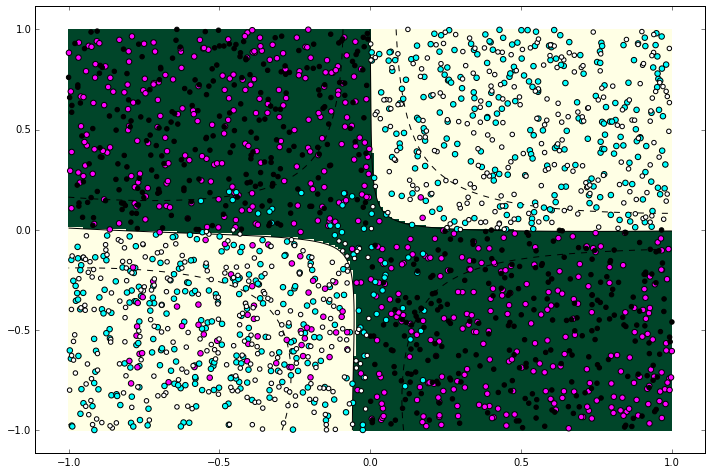

In [18]:
#para casos representativos
clf = SVC(C=1, kernel="poly",degree=2, coef0=1)
clf = clf.fit(X_train,Y_train)
print "KERNEL POLY, C=1, DEGREE=2 \n Test Accuracy = ", clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

clf = SVC(C=1, kernel="rbf")
clf = clf.fit(X_train,Y_train)
print "KERNEL RBF, C=1 \n Test Accuracy = ", clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

clf = SVC(C=4, kernel="rbf")
clf = clf.fit(X_train,Y_train)
print "KERNEL RBF, C=4 \n Test Accuracy = ", clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

Se puede observar en la representación gráfica de la clasificación del algoritmo **SVM** con *Kernel no lineal*, que la separación entre clases esta mucho mejor lograda que en la *SVM lineal*, ya que visualmente en cada lado de la frontera predomina un color diferente asociado a cada clase, donde la zona oscura de la separación SVM corresponde a los asignados como 1 y la zona sin color (Fondo blanco) es asignado como 0. Los pequeños errores perceptibles se pueden observar en mayor medida en el centro de la representacion, ya que se produce una mezcla con una cantidad similar de datos de cada clase. Para la variación del hiperparámetro *C*, se puede ver que con un *C* mayor, el problema se restringe más al *training set*, esto se visualiza en los gráficos anteriores de clasificación, donde con un *kernel* RBF al pasar de *C*=1 a *C*=4 el área en el centro es acotada, siendo mas pequeña ajustándose mejor al *training set* y clasificando mejor los datos. Gracias a esto se puede mostrar que una SVM no lineal puede clasificar los datos correctamente.

A continuación se presentan 2 casos extremos donde el parámetro *C* pasa a ser 100, analizando el mayor poder dimensional que tiene el *kernel* RBF.

KERNEL RBF, C=100 
 Test Accuracy =  0.98


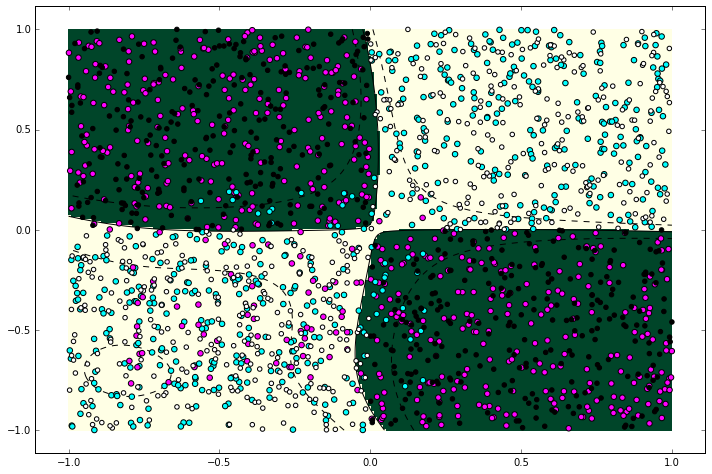

KERNEL POLY, DEGREE = 10 C=100 
 Test Accuracy =  0.969


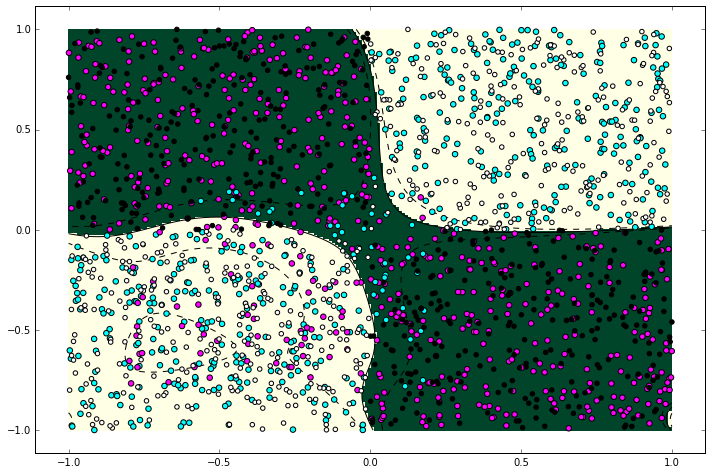

In [4]:
from sklearn.svm import SVC

clf = SVC(C=100, kernel="rbf")
clf = clf.fit(X_train,Y_train)
print "KERNEL RBF, C=100 \n Test Accuracy = ", clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

clf = SVC(C=100, kernel="poly",degree = 10, coef0=1)
clf = clf.fit(X_train,Y_train)
print "KERNEL POLY, DEGREE = 10 C=100 \n Test Accuracy = ", clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

En estos gráficos se aprecia que un *kernel* RBF tiene un mayor poder dimensional ya que genera esta separación mas flexible dimensionalmente, separando los datos y clasificándolos de una mejor manera, mostrándose mas claro en la medida de desempeño *accuracy* igual a 98% y en la representación gráfica. Para el *kernel* Polinomial con un alto poder dimensional (grado 10) presenta fronteras bastante curvas y flexibles, sin alcanzar las fronteras del *kernel* RBF. Esto muestra que para clasificar un problema que requiere flexibilidad en su fronteras de clasificación es recomendable el uso de un algoritmo SVM no lineal con *kernel* Gaussiano (RBF).

## D) Red Neuronal de una neurona

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

X_train,Y_train,X_test,Y_test = do_XOR(svm=False)

n_h=1 #1 neurona

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
print "\nTest Accuracy (activation sigmoid) = %f"%scores[1]
print "---------------------------------------------------------"

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="relu"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
print "\nTest Accuracy (activation relu) = %f"%scores[1]
print "---------------------------------------------------------"

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="softmax"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
print "\nTest Accuracy (activation softmax) = %f"%scores[1]
print "---------------------------------------------------------"

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="linear"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
print "\nTest Accuracy (activation linear) = %f"%scores[1]
print "---------------------------------------------------------"

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
print "\nTest Accuracy (activation sigmoid, optimizer SGD lr = 0.1) = %f"%scores[1]
print "---------------------------------------------------------"

model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], init="uniform", activation="relu"))
model.add(Dense(n_h, init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="poisson", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
print "\nTest Accuracy (activation relu, loss = poisson) = %f"%scores[1]
print "---------------------------------------------------------"

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="squared_hinge", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
print "\nTest Accuracy (activation sigmoid, loss = squared_hinge) = %f"%scores[1]
print "---------------------------------------------------------"

Using Theano backend.


  32/1000 [..............................] - ETA: 0s
Test Accuracy (activation sigmoid) = 0.516000
---------------------------------------------------------
 736/1000 [=====================>........] - ETA: 0s
Test Accuracy (activation relu) = 0.000000
---------------------------------------------------------
  32/1000 [..............................] - ETA: 0s
Test Accuracy (activation softmax) = 0.511000
---------------------------------------------------------
  32/1000 [..............................] - ETA: 0s
Test Accuracy (activation linear) = 0.000000
---------------------------------------------------------
  32/1000 [..............................] - ETA: 0s
Test Accuracy (activation sigmoid, optimizer SGD lr = 0.1) = 0.476000
---------------------------------------------------------
 704/1000 [====================>.........] - ETA: 0s
Test Accuracy (activation relu, loss = poisson) = 0.663000
---------------------------------------------------------
  32/1000 [..............

En la celda anterior se ve las medidas de desempeños de distintas arquitecturas para un modelo de red neuronal de una sola capa, donde la mejor pasa a ser del 50% con la activación de esa neurona como una función softmax. A continuación se aprecia visualmente lo que representa esta medición del 50% para este problema, en conjunto con otras representaciones con buenas mediciones (cercano al 50%), debido a que por lo anteriormente explicado con la SVM lineal, un *accuracy* del 50% podría ser que los clasifique a la mayoría como una sola clase (positiva o negativa).

Softmax


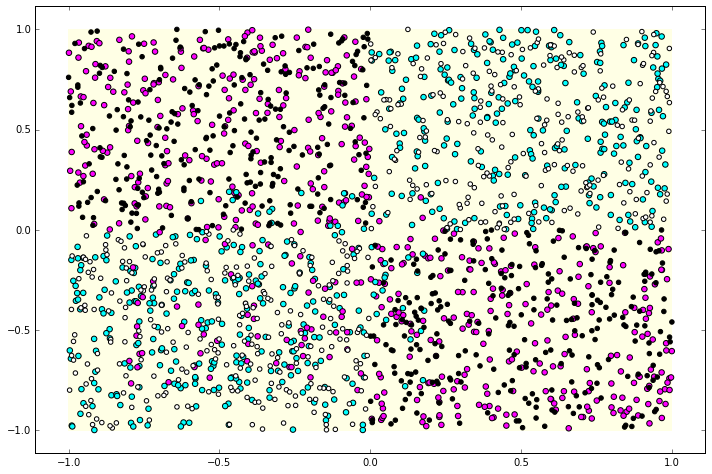

Sigmoid


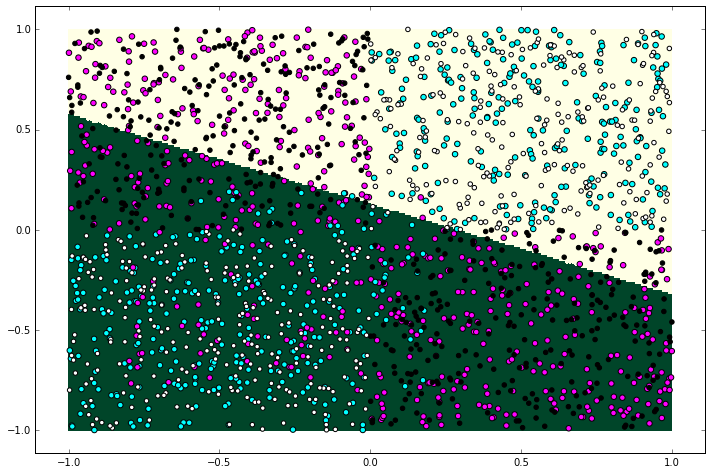

Sigmoid with loss poisson


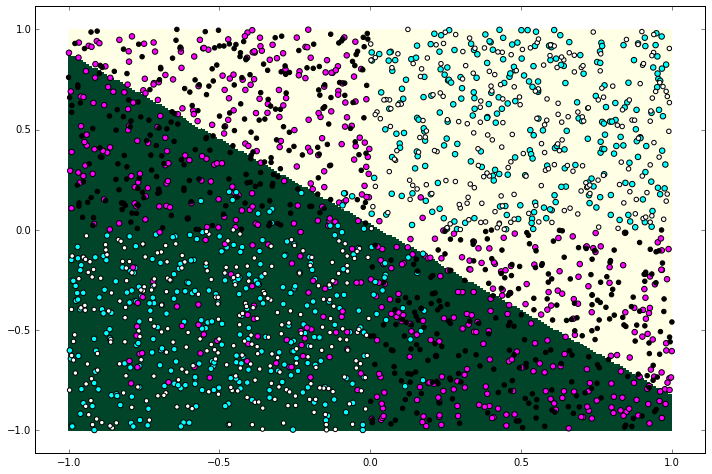

In [22]:
#para casos representativos
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="softmax"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
print "Softmax"
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
print "Sigmoid"
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="poisson", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
print "Sigmoid with loss poisson"
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

Para los gráficos en que no se presenta la frontera con color verde oscuro es debido a que la red neuronal se ajusta llegando a predecir todos los datos como positivos o como negativos, entregando medida de desempeño alrededor del 50% debido a que esta clasificación es binaria por lo que el peor caso es clasificarlos a todos como una clase y tener un *accuracy* alrededor del 50%.  
El mejor caso se presenta con la función de activación sigmoid y función de pérdida poisson, definiendo una frontera, cercana a la mitad del espacio, aún así no siendo la clasificación requerida para este problema.  
Para estos gráficos se puede ver que una red neuronal con una única neurona no logra resolver el problema, debido a que no proporciona fronteras y una clasificación adecuada a los datos, sino que clasifica a la mayoría por igual como un método de fuerza bruta, asignándolos a todos como positivos o a todos como negativos, esto es debido a que una red neuronal con una neurona no tiene las suficiente capacidad para clasificar un problema de este tipo que requiere un mayor procesamiento. En base a esta representación visual de que esta red neuronal de una neurona no está clasificando los datos en base a sus características, y la mejor medida de desempeño del 50% se puede concluir que una red neuronal con una neurona no logra satistacer el problema.

## E) Red neuronal con una capa escondida

[2, 4, 8, 16, 32]
  32/1000 [..............................] - ETA: 0s
 Test Accuracy = 0.966000


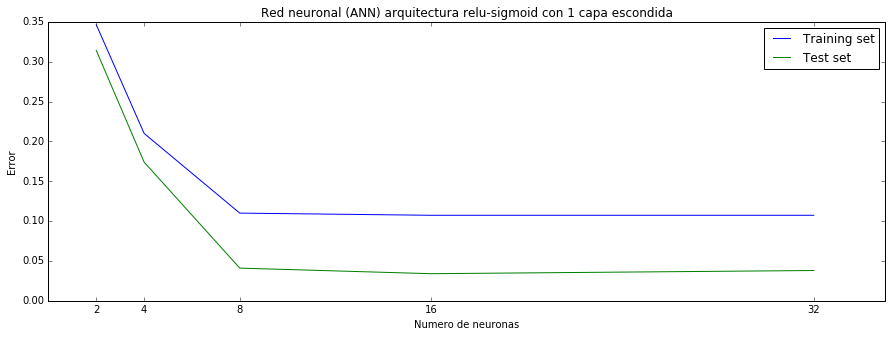

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report,precision_recall_fscore_support

X_train,Y_train,X_test,Y_test = do_XOR(svm=False)

#alterar valores de los parametros en la red neuronal
N_hs = [pow(2,k) for k in np.arange(1,6,1)]
print N_hs

def do_ANN(xtrain,ytrain,xtest,ytest):
    mejor = 0
    info_train = []
    info_test = []
    for n in N_hs:
        model = Sequential()
        model.add(Dense(n, input_dim=xtrain.shape[1], init='uniform', activation='relu'))
        model.add(Dense(1, init='uniform', activation='sigmoid'))
        model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(xtrain, ytrain, nb_epoch=50, batch_size=100, verbose=0)
                
        info_train.append(model.evaluate(xtrain, ytrain)[1])
        
        test_acc = model.evaluate(xtest, ytest)[1]
        info_test.append(test_acc)
        if test_acc > mejor:
            mejor = test_acc
            
    print "\n Test Accuracy = %f"%mejor
    return info_train,info_test
info_tr,info_ts = do_ANN(X_train,Y_train,X_test,Y_test)

error_train = [1-i for i in info_tr]
error_test = [1-j for j in info_ts]

import matplotlib.pyplot as plt
plt.figure( figsize=(15,5))
plt.plot(N_hs,error_train, label = "Training set")
plt.plot(N_hs,error_test, label = "Test set")
plt.xticks(N_hs)
plt.xlabel('Numero de neuronas')
plt.ylabel('Error')
plt.title('Red neuronal (ANN) arquitectura relu-sigmoid con 1 capa escondida')
plt.legend(loc = 'upper right')
plt.show()

En la celda anterior se ajustan 2 arquitecturas para una red neuronal con una capa escondida, variando la cantidad de las neuronas en esa capa, presentando su mejor medida de desempeño del 97,1%, valor mucho mejor que el de una red neuronal con una neurona. En este gráfico se puede ver como a medida que aumenta el número de neuronas en la capa escondida esto beneficia el procesamiento de los datos (*input*) produciéndo un mejor *output* (visto en la medición del error), donde con 8 neuronas o más el procesamiento no aporta mayor poder de clasificación.

  32/1000 [..............................] - ETA: 0s
 Test Accuracy (activation relu-sigmoid, 2 neuronas) =  0.828


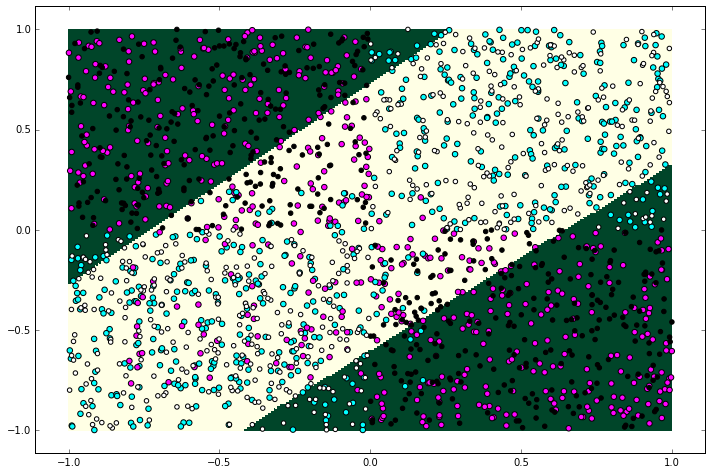

  32/1000 [..............................] - ETA: 0s
 Test Accuracy (activation relu-sigmoid, 8 neuronas) = 0.907000


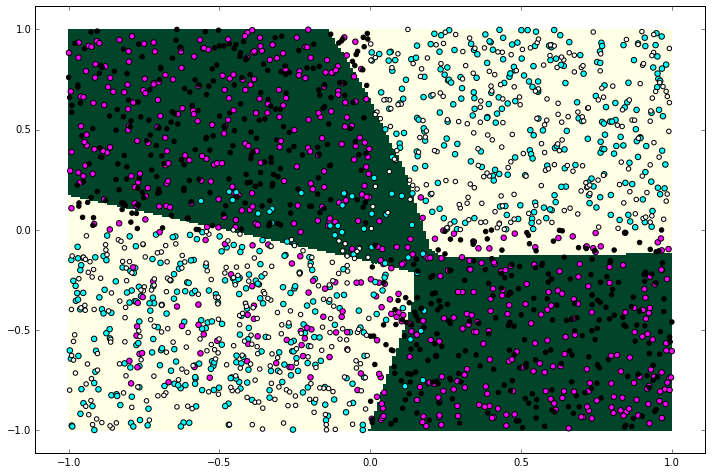

  32/1000 [..............................] - ETA: 0s
 Test Accuracy (activation relu-sigmoid, 32 neuronas) = 0.965000


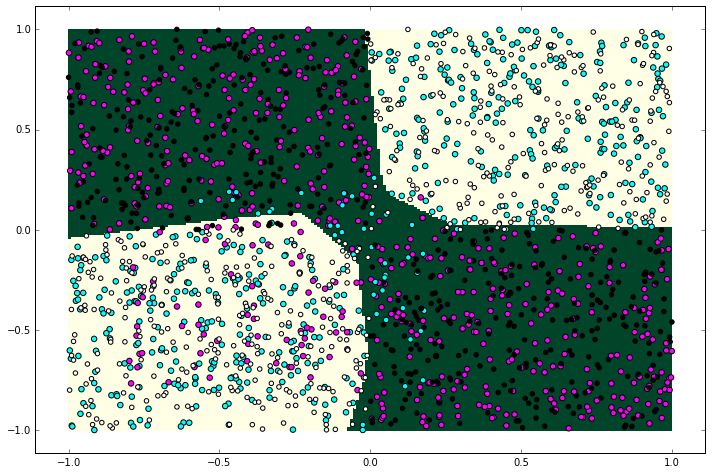

In [11]:
#para casos representativos
model = Sequential()
model.add(Dense(2, input_dim=X_train.shape[1], init="uniform", activation="relu"))
model.add(Dense(1, init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
print "\n Test Accuracy (activation relu-sigmoid, 2 neuronas) = ",scores[1]
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], init="uniform", activation="relu"))
model.add(Dense(1, init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
print "\n Test Accuracy (activation relu-sigmoid, 8 neuronas) = %f"%scores[1]
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], init="uniform", activation="relu"))
model.add(Dense(1, init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
print "\n Test Accuracy (activation relu-sigmoid, 32 neuronas) = %f"%scores[1]
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")
#model.summary()

En los gráficos anteriores se visualiza la clasificación generada por una red neuronal con una capa escondida, donde la frontera de fondo verde es asociada a los datos clasificados como positivos y la frontera de fondo blanco son los datos clasificados como negativos. Se puede ver que con 2 neuronas el procesamiento de los datos ya aumenta comparado con una única neurona (de la pregunta anterior), generando dos fronteras cruzando los cuadrantes de las clases positivas y negativas, como esta separación abarca gran cantidad de los datos entrega un buena medición de *accuracy*. Por otro lado al añadir más neuronas a la capa escondida de la red neuronal (8 y 32) se puede ver que estas ofrecen una flexibilidad superior, procesando el *input* y entregando una clasificación adecuada con fronteras que satisfacen el problema, para el caso de 32 neuronas.  
Debido al comportamiento estocástico de la resolución del optimizador, las redes neuronales generan distintas fronteras cada vez que son ejecutadas. Para la red neuronal con 8 neuronas en la capa escondida genera distintas fronteras variables donde en algunos casos entrega una muy buena clasificación, siendo consecuencia del proceso aleatorio no se considera una respuesta (medición) tan relevante por lo que se recomienda utilizar más neuronas para procesar la clasificación de los datos y así no variar tanto en la generación del modelo siendo más robustas en entregar un buen desempeño.

## F) Árbol de clasificación - 1 nivel

==============  ===================  ===============  ===========  ========
Config            Training Accuracy    Test Accuracy    Precision    Recall
==============  ===================  ===============  ===========  ========
Gini-best                     0.489            0.489     0.483728  0.5
Entropy-best                  0.486            0.486     0.487386  0.333333
Gini-random                   0.491            0.491     0.489605  0.526316
Entropy-random                0.491            0.491     0.489605  0.526316
==============  ===================  ===============  ===========  ========
Gini-best


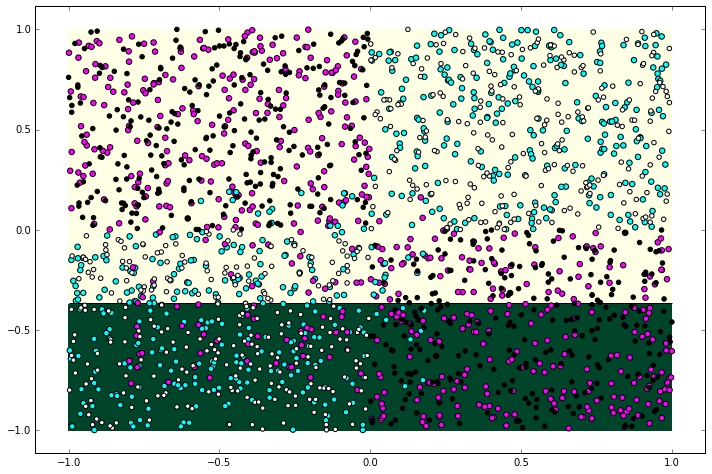

Entropy-random


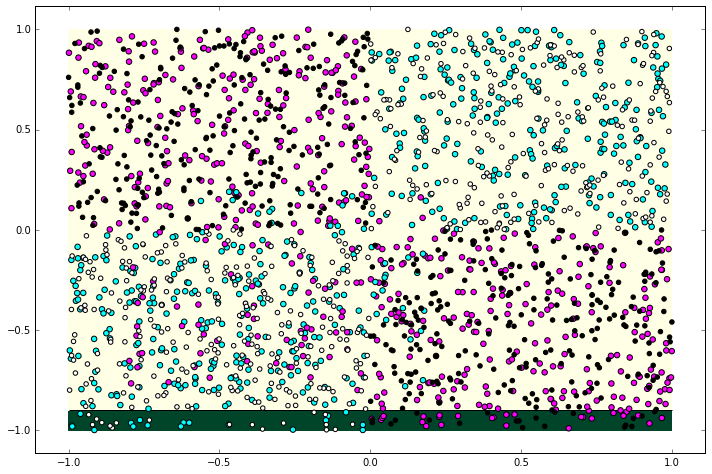

In [36]:
from sklearn.tree import DecisionTreeClassifier as Tree

X_train,Y_train,X_test,Y_test = do_XOR(svm=False)

info = []

clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_train = clf.score(X_test,Y_test)
acc_test = clf.score(X_test,Y_test)
prec_rec = precision_recall_fscore_support(Y_test,clf.predict(X_test))[:1]
info.append([acc_train,acc_test]+list(prec_rec[0]))

clf=Tree(criterion="entropy",splitter="best",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_train = clf.score(X_test,Y_test)
acc_test = clf.score(X_test,Y_test)
prec_rec = precision_recall_fscore_support(Y_test,clf.predict(X_test))[:1]
info.append([acc_train,acc_test]+list(prec_rec[0]))

clf=Tree(criterion="gini",splitter="random",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_train = clf.score(X_test,Y_test)
acc_test = clf.score(X_test,Y_test)
prec_rec = precision_recall_fscore_support(Y_test,clf.predict(X_test))[:1]
info.append([acc_train,acc_test]+list(prec_rec[0]))

clf=Tree(criterion="entropy",splitter="random",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_train = clf.score(X_test,Y_test)
acc_test = clf.score(X_test,Y_test)
prec_rec = precision_recall_fscore_support(Y_test,clf.predict(X_test))[:1]
info.append([acc_train,acc_test]+list(prec_rec[0]))
                      

names = ["Gini-best", "Entropy-best", "Gini-random", "Entropy-random"]
table = [[names[i]] + info[i] for i in range(len(info))]
from tabulate import tabulate
print tabulate(table, headers=["Config","Training Accuracy", "Test Accuracy","Precision","Recall"],  tablefmt="rst")

#para casos representativos
clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
print "Gini-best"
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")

clf=Tree(criterion="entropy",splitter="random",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
print "Entropy-random"
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")

Se puede observar en la representación grafica de la clasificacion, que *stump* (*Árbol de Decisión* de 1 nivel) no resuelve satisfactoriamente el problema, ya que no realiza una separacion entre clases como es la esperada, donde para el caso de la configuración "entropy-random" deja aproximadamente el $98\%$ de los datos en una clase y el resto en otra, produciendo una gran mezcla de clases en ambos lados, lo mismo pasa para la configuración "gini-best".  
Al modificar los parámetros *criterion* entre los valores ''gini'' y ''entropy'' y *splitter* entre los valores ''best'' y ''random'' se obtienen distintos valores para el *accuracy*, los que se resumen en la tabla de mas arriba, donde para distintas configuraciones del árbol de 1 nivel se puede determinar que ninguna logra desempeños adecuados, esto sumado a la representación gráfica indicando que este clasificador no está realizando fronteras y separando las clases, se determina que *stump* no puede satisfacer este problema.  
En esta tabla se puede ver que al setear el parámetro *splitter* en "random", se produce el mismo *accuracy* tanto en "gini" como con "entropy", pero si se setea *splitter* como "best", se obtiene una leve mejora en el *accuracy* con  respecto a"gini.

## G) Árbol de clasificación - múltiples niveles

Best Test Accuracy = 0.990000


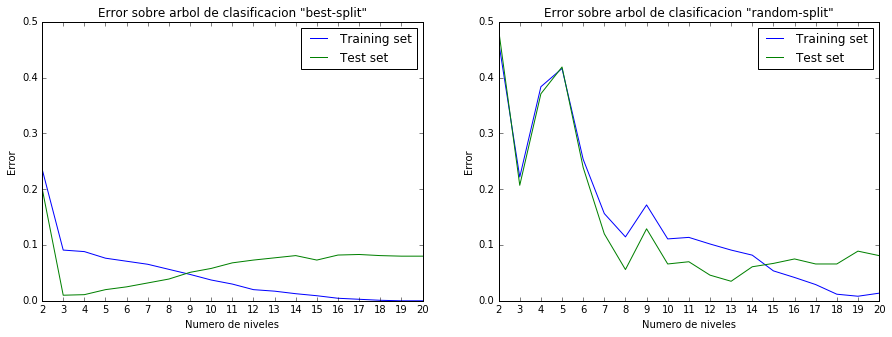

=========  ===================  ===============  ===========  ========
  Niveles    Training Accuracy    Test Accuracy    Precision    Recall
=========  ===================  ===============  ===========  ========
        2             0.763636            0.798     0.793456  0.802348
        3             0.909091            0.99      0.98778   0.992141
        4             0.911818            0.989     0.993802  0.984496
        5             0.923636            0.98      0.975659  0.984221
        6             0.929091            0.975     0.967742  0.982143
        7             0.934545            0.968     0.956088  0.97996
        8             0.943636            0.961     0.948207  0.973896
        9             0.952727            0.949     0.936255  0.961847
       10             0.962727            0.942     0.933602  0.950298
       11             0.97                0.932     0.926978  0.936884
       12             0.98                0.927     0.922764  0.931102
       

In [37]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import classification_report,precision_recall_fscore_support

X_train,Y_train,X_test,Y_test = do_XOR(svm=False)

info = []
N_ts = np.arange(2,21,1)
def do_Tree(x,y,xt,yt):
    mejor = 0
    info_1 = []
    info_2 = []
    for n_t in N_ts:
        clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=n_t)
        clf.fit(x,y)
        acc = clf.score(x,y)
        acc_t = clf.score(xt,yt)

        
        if acc_t > mejor:
            mejor = acc_t
        info_1.append([acc,acc_t])
        
        prec_rec = precision_recall_fscore_support(yt,clf.predict(xt))[:1]
        info.append([n_t,acc,acc_t]+list(prec_rec[0]))
    

        clf=Tree(criterion="gini",splitter="random",random_state=0,max_depth=n_t)
        clf.fit(x,y)
        acc = clf.score(x,y)
        acc_t = clf.score(xt,yt)
        if acc_t > mejor:
            mejor = acc_t
        info_2.append([acc,acc_t])
    print "Best Test Accuracy = %f"%mejor
    return info_1,info_2

info1,info2 = do_Tree(X_train,Y_train,X_test,Y_test)
error_train = [ 1-i[0] for i in info1]
error_test = [1-j[1] for j in info1]
error_train2 = [ 1-i[0] for i in info2]
error_test2 = [1-j[1] for j in info2]

import matplotlib.pyplot as plt
f, axarr = plt.subplots(1, 2, figsize=(15,5))
axarr[0].plot(N_ts,error_train, label = "Training set")
axarr[0].plot(N_ts,error_test, label = "Test set")
axarr[0].set_xticks(N_ts)
axarr[0].set_xlabel('Numero de niveles')
axarr[0].set_ylabel('Error')
axarr[0].set_title('Error sobre arbol de clasificacion "best-split"')
axarr[0].set_ylim(0,0.5)
axarr[0].legend(loc="upper right")

axarr[1].plot(N_ts,error_train2, label = "Training set")
axarr[1].plot(N_ts,error_test2, label = "Test set")
axarr[1].set_xticks(N_ts)
axarr[1].set_xlabel('Numero de niveles')
axarr[1].set_ylabel('Error')
axarr[1].set_title('Error sobre arbol de clasificacion "random-split"')
axarr[1].legend(loc="upper right")
plt.show()

#mostrar tabla con precision y bla en base a los niveles
from tabulate import tabulate
print tabulate(info, headers=["Niveles","Training Accuracy", "Test Accuracy","Precision","Recall"],  tablefmt="rst")

En las celdas anteriores se trabaja con un *Árbol de Decisión* de múltiples niveles. Para estudiar el efecto de los multiples niveles se confeccionan dos graficos de error, del *training set* y del *test set*, versus número de niveles, en el que cada uno posee un modelo de árbol con la parámetro *criterion* seteada en "gini", correspondiente al criterio para medir la calidad de cual característica separa mejor la data en cada nivel, se muestra la diferencia que existe entre setear el parámetro "splitter" en ''best'' y ''random'' respectivamente, correspondiente a decidir cual característica tomar en cada nivel, la mejor (*best*) o aleatorio (*random*).  
En el primer gráfico, el cual usa ''best-split'' se puede observar que a mayor nivel de profundidad del árbol, en un principio tiende a disminuir bruscamente el error, lo cual es lo esperado, luego a partir del nivel 3, el error de entrenamiento y el de test comienzan a comportarse de manera inversa, es decir, el error de test comienza a aumentar gradualmente hasta alcanzar un valor constante de aproximadamente 0.1 y el error de entrenamiento comienza a disminuir de la misma forma, partiendo aproximadamente de 0.1 y bajando de igual forma hasta tener error nulo, produciendo un *overfitting* a medida que se aumentan en gran medida la cantidad de niveles del árbol de decisión. Esto se produce ya que un árbol muy profundo pierde generalidad.

El segundo grafico utiliza el ''random-split'' se puede observar que a medida que se aumenta el numero de niveles, el error en un principio decae bruscamente, pero que a partir del nivel 3 empieza a tener un comportamiento oscilante, es decir, el error empieza a subir y bajar, pero cada vez en menor grado, lo que se traduce en oscilaciones cada vez mas pequeñas, este comportamiento es debido a la selección aleatoria de la mejor característica para hacer la separación en cada nivel. Una observación interesante resulta la de que con el parámetro "random" el *overfitting* se produce desde el nivel 15 en adelante aproximadamente, por otro lado con el parámetro "best" se produce desde el nivel 9 en adelante.  

En base a las métricas presentadas en la tabla, se puede ver que todas mejoraron en relación al caso anterior con un *Árbol de Decisión* de un único nivel, teniendo valores del 90% en adelante a partir del tercer nivel. Además se aprecia el claro *overfitting* en los nivees 19 y 20 cuando el *accuracy* sobre el *training set* pasa a ser 100% y sobre el *test set* esto no se refleja.

Arbol de 2 niveles
Test Accuracy = 0.798000


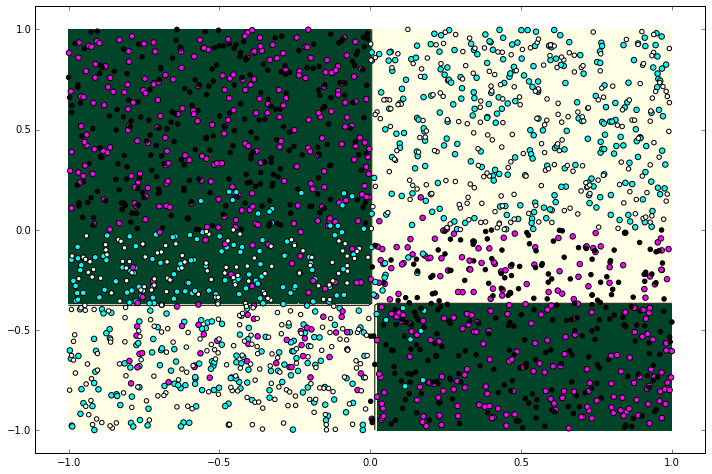

Arbol de 4 niveles
Test Accuracy = 0.989000


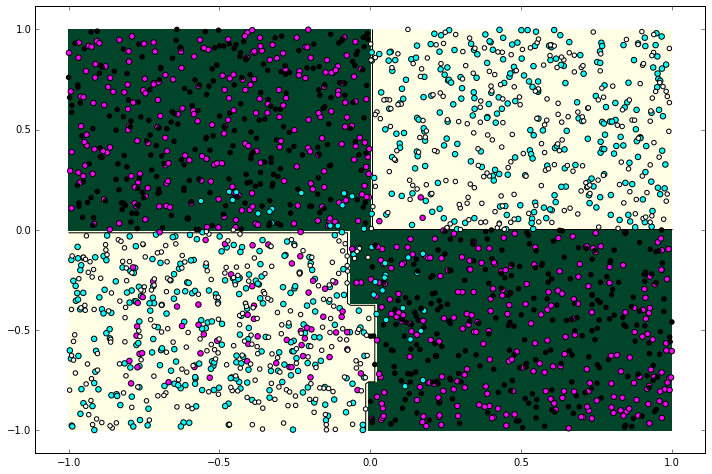

Arbol de 15 niveles
Test Accuracy = 0.927000


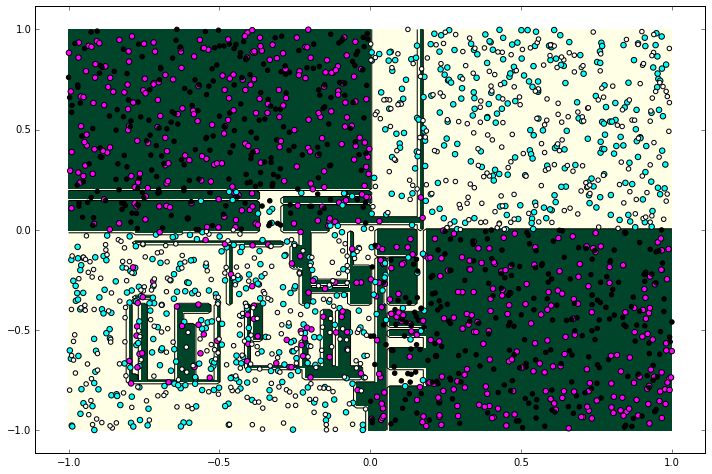

In [39]:
#para casos representativos
clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=2)
clf.fit(X_train,Y_train)
print "Arbol de 2 niveles"
print "Test Accuracy = %f"%clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")

clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=4)
clf.fit(X_train,Y_train)
print "Arbol de 4 niveles"
print "Test Accuracy = %f"%clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")

clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=15)
clf.fit(X_train,Y_train)
print "Arbol de 15 niveles"
print "Test Accuracy = %f"%clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")

En la representación gráfica de la clasificación realizada por *Árbol de Decisión* para distintos niveles presentada anteriormente, se puede verificar visualmente que a una mayor cantidad de niveles el clasificador se sobre ajusta al *training set*. Se puede ver que con un *Árbol de Decisión* de 2 niveles genera unicamente 2 diviones del espacio lo cual no logra totalmente el objetivo propuesto, sin embargo cuando ya existen 4 niveles se posee un mayor desempeño, sin sobre ajustar el modelo sobre el *training set* produciendo una clasificación bastante buena comparado con un Árbol de clasificación de un nivel o de muchos niveles, como por ejemplo el 15 niveles. Los árboles mas profundos como se muestra visualmente el de 15 niveles, intenta agregar a la clasificación los datos que fueron del *training set* que fueron agregados simbolizando el ruido, en el tercer cuadrante, cosa que se desea evitar. Con esto se muestra que un árbol muy profundo no necesariamente satisface el problema, quedándose con un árbol de más de un nivel pero sin exceder en la profundidad de este.  
Se verifica que un *Árbol de Decisión* con múltiples niveles tiene el suficiente poder para satisfacer el problema clasificando sin sobre ajustar a los datos del *training set* pertenecientes al ruido, teniendo una cantidad de niveles del Árbol mínima, para no producir este *overfitting*.